In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
all_df = pd.read_csv('all_sites_scores.csv')
all_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [5]:
ferdango_ratings = pd.read_csv('fandango_scrape.csv')
ferdango_ratings.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
ferdango_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
ferdango_ratings.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

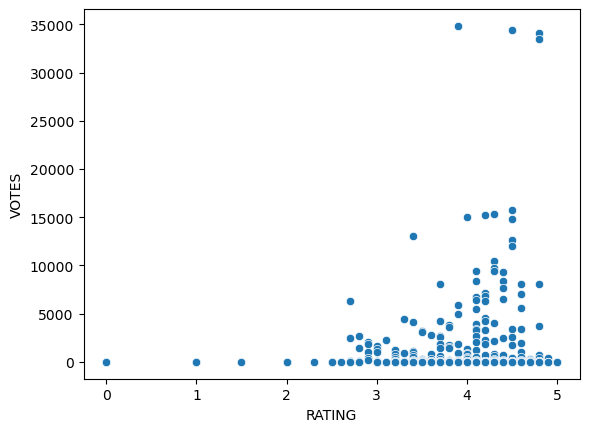

In [12]:
sns.scatterplot(data=ferdango_ratings,x='RATING',y='VOTES')

In [13]:
ferdango_ratings.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [22]:
ferdango_ratings['Year'] = ferdango_ratings['FILM'].str[-5:-1]
ferdango_ratings

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [29]:
ferdango_ratings['Year1'] = ferdango_ratings['FILM'].apply(lambda x : x[-5:-1])
ferdango_ratings

,FILM,STARS,RATING,VOTES,Year,Year1
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,2015
1,Jurassic World (2015),4.5,4.5,34390,2015,2015
2,American Sniper (2015),5.0,4.8,34085,2015,2015
3,Furious 7 (2015),5.0,4.8,33538,2015,2015
4,Inside Out (2015),4.5,4.5,15749,2015,2015
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964,1964


In [30]:
# how many movies does ferdango has per year
ferdango_ratings['Year'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

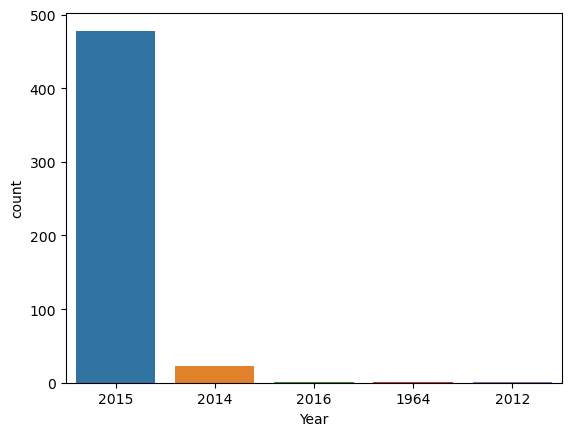

In [31]:
# count of movies per year with a plot
sns.countplot(data=ferdango_ratings,x='Year')

In [36]:
# 10 movies with higher no of votes
ferdango_ratings.sort_values('VOTES',ascending=False)[0:10]

,FILM,STARS,RATING,VOTES,Year,Year1
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,2015
1,Jurassic World (2015),4.5,4.5,34390,2015,2015
2,American Sniper (2015),5.0,4.8,34085,2015,2015
3,Furious 7 (2015),5.0,4.8,33538,2015,2015
4,Inside Out (2015),4.5,4.5,15749,2015,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,2015
7,Minions (2015),4.0,4.0,14998,2015,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,2015
9,Into the Woods (2014),3.5,3.4,13055,2014,2014


In [37]:
ferdango_ratings.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,Year,Year1
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,2015
1,Jurassic World (2015),4.5,4.5,34390,2015,2015
2,American Sniper (2015),5.0,4.8,34085,2015,2015
3,Furious 7 (2015),5.0,4.8,33538,2015,2015
4,Inside Out (2015),4.5,4.5,15749,2015,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,2015
7,Minions (2015),4.0,4.0,14998,2015,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,2015
9,Into the Woods (2014),3.5,3.4,13055,2014,2014


In [42]:
# how many movies has 0 votes
len(ferdango_ratings[ferdango_ratings['VOTES'] == 0])

69

In [44]:
nf_df = ferdango_ratings[ferdango_ratings['VOTES'] > 0]
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   Year    435 non-null    object 
 5   Year1   435 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.8+ KB


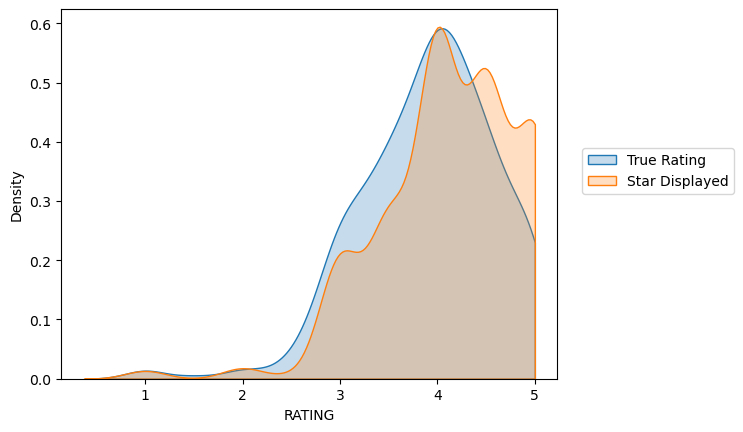

In [62]:
# KDE plot for stars v/s ratings
#sns.kdeplot(data=nf_df,x='STARS')
sns.kdeplot(data=nf_df,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=nf_df,x='STARS',clip=[0,5],fill=True,label='Star Displayed')
plt.legend(loc=(1.05,0.5))

In [64]:
# new col with difference of Displayed - Actual Rating
nf_df['STARS_DIFF'] = nf_df['STARS'] - nf_df['RATING']
nf_df['STARS_DIFF'] = nf_df['STARS_DIFF'].round(2)
nf_df

C:\Users\rupak\AppData\Local\Temp\ipykernel_13600\189200604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_df['STARS_DIFF'] = nf_df['STARS'] - nf_df['RATING']
C:\Users\rupak\AppData\Local\Temp\ipykernel_13600\189200604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_df['STARS_DIFF'] = nf_df['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,Year,Year1,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,2015,0.0
...,...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

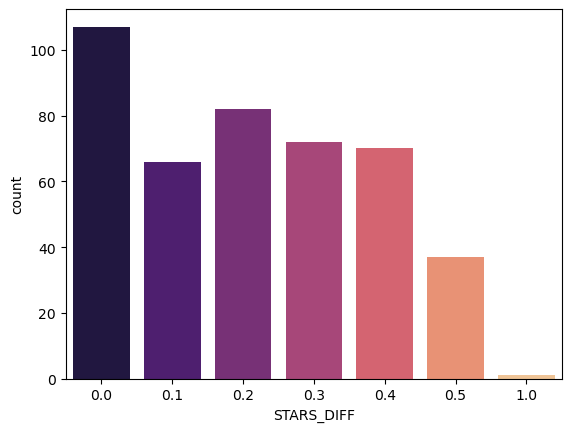

In [66]:
sns.countplot(data=nf_df,x='STARS_DIFF',palette='magma')

In [69]:
# which movies has close to 1 difference between stars displayed v/s actual rating
nf_df[nf_df['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,Year,Year1,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,2015,1.0


In [87]:
all_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [71]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [72]:
all_df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

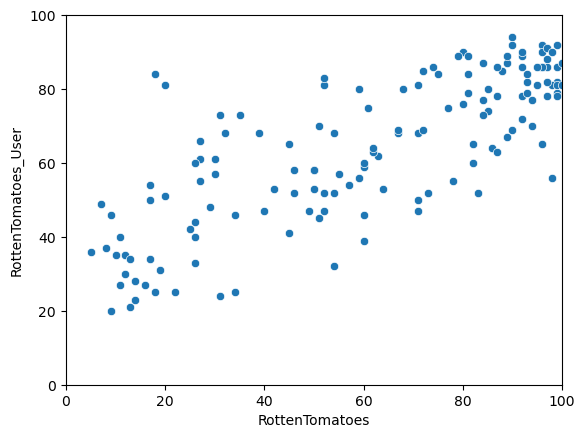

In [88]:
# scatter plot for rotten tomatoes critic review v/s user review
sns.scatterplot(data=all_df,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [89]:
# new col to measure difference between rotten tomates critic rating v/s user rating
all_df['Rotten_Diff'] = all_df['RottenTomatoes'] - all_df['RottenTomatoes_User']
all_df[all_df['Rotten_Diff'] > 0]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
5,The Water Diviner (2015),63,62,50,6.8,7.2,34,39373,1
7,Top Five (2014),86,64,81,6.8,6.5,124,16876,22
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227,17
9,Love & Mercy (2015),89,87,80,8.5,7.8,54,5367,2
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


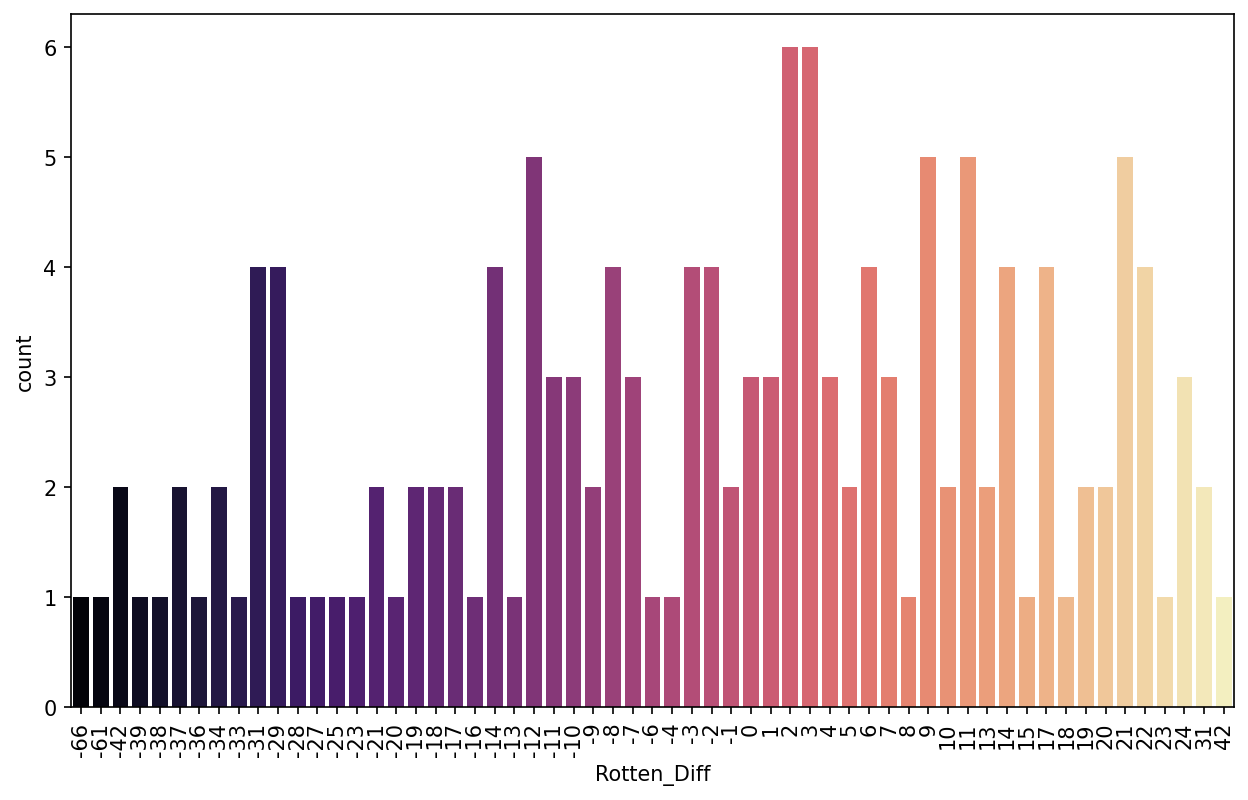

In [98]:
plt.figure(figsize=(10,6),dpi=150)
sns.countplot(data=all_df,x='Rotten_Diff',palette='magma')
plt.xticks(rotation=90);

In [92]:
# mean absolute difference
all_df['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

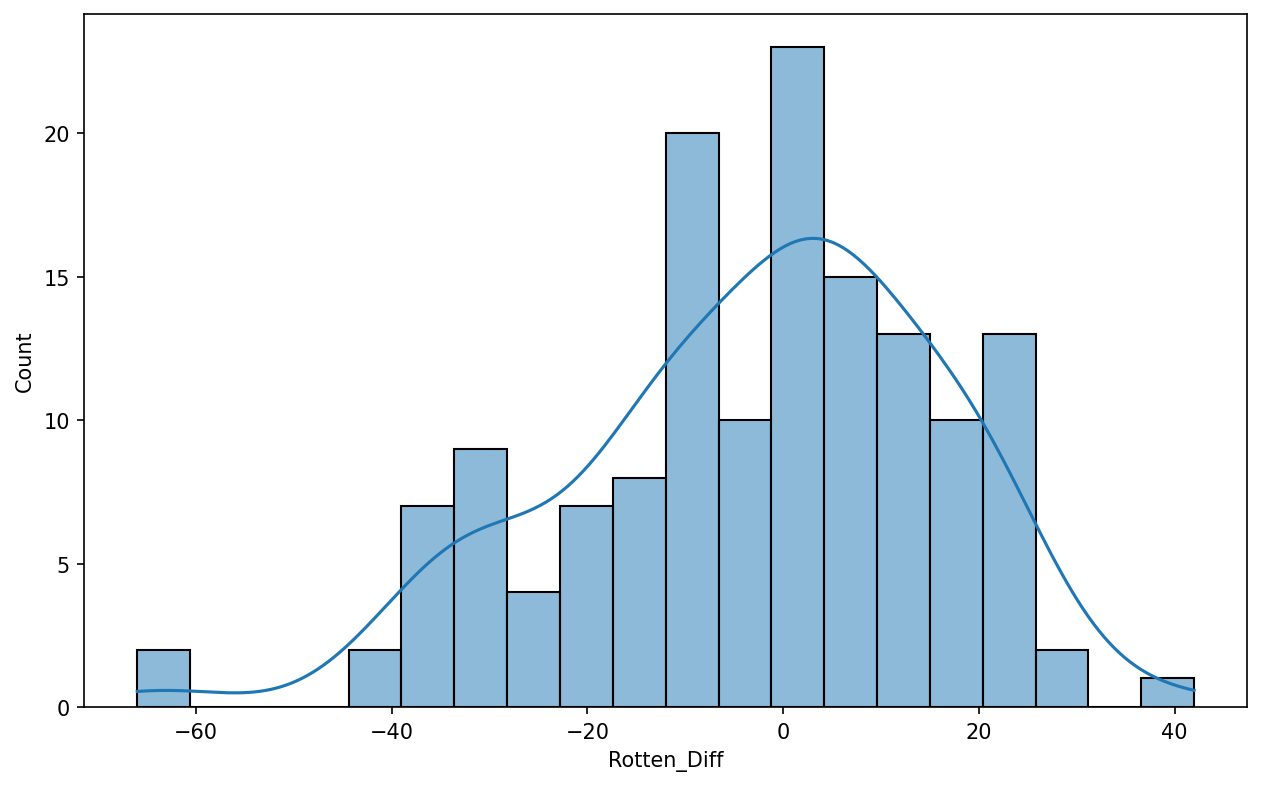

In [99]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(data=all_df,x='Rotten_Diff',kde=True,bins=20)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

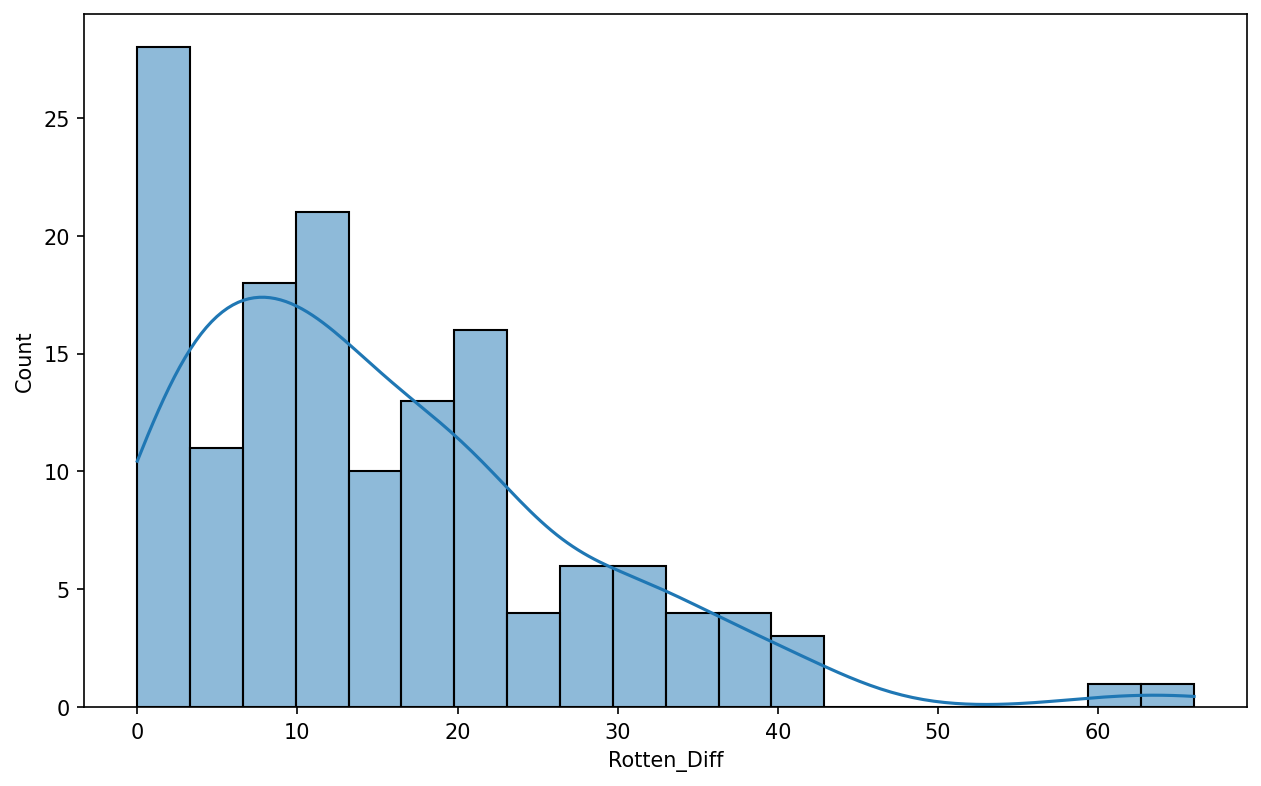

In [101]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(x=all_df['Rotten_Diff'].apply(abs),kde=True,bins=20)

In [110]:
# top 5 movies user rated higher than critics
all_df.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [111]:
# top 5 movies critics rated higher than users
all_df.nlargest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


In [112]:
all_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


(0.0, 10.0)

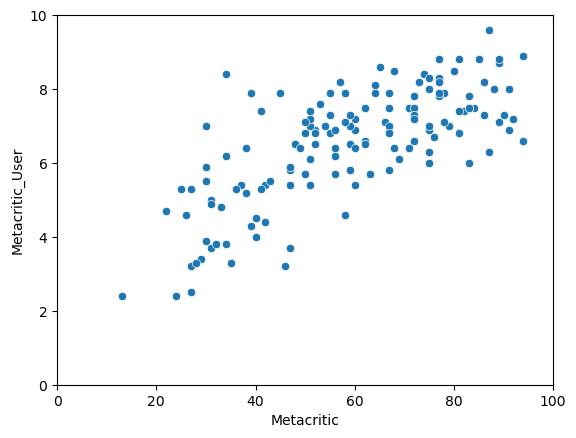

In [115]:
# scatter plot metacritic rating v/s user rating
sns.scatterplot(data=all_df,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

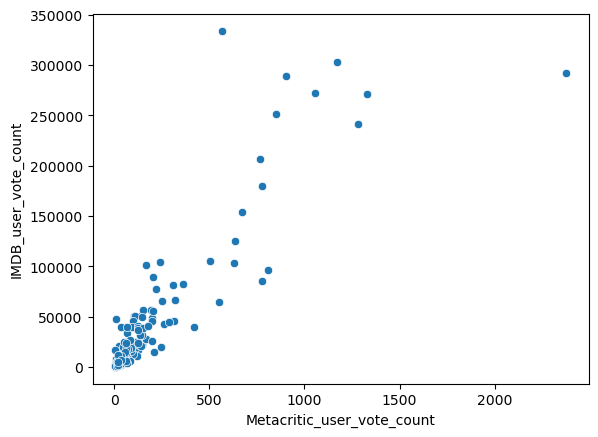

In [116]:
# vote counts by imdb v/s metacritic
sns.scatterplot(data=all_df,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [118]:
# movies with highest vote
all_df.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [119]:
all_df.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [120]:
# ferdango and others
df = pd.merge(ferdango_ratings,all_df,on='FILM')

In [121]:
df

,FILM,STARS,RATING,VOTES,Year,Year1,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,2015,95,86,86,7.3,7.4,14,696,9


In [122]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [129]:
# normalize ferdango ratings
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [135]:
df['M_Norm'] = np.round(df['Metacritic']/20,1)
df['MU_Norm'] = np.round(df['Metacritic_User']/2,1)

In [136]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)


In [137]:
df

,FILM,STARS,RATING,VOTES,Year,Year1,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [152]:
df_norm = df[['RATING','STARS','RT_Norm','RTU_Norm','M_Norm','MU_Norm','IMDB_Norm']]
df_norm

,RATING,STARS,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm
0,3.9,4.0,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,4.8,5.0,3.6,4.2,3.6,3.3,3.7
3,4.8,5.0,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,3.6,4.0,4.8,4.0,4.4,3.2,3.5
142,4.2,4.5,4.6,4.2,3.4,3.5,3.9
143,3.9,4.0,4.8,4.3,4.3,3.6,3.7


<AxesSubplot:ylabel='Density'>

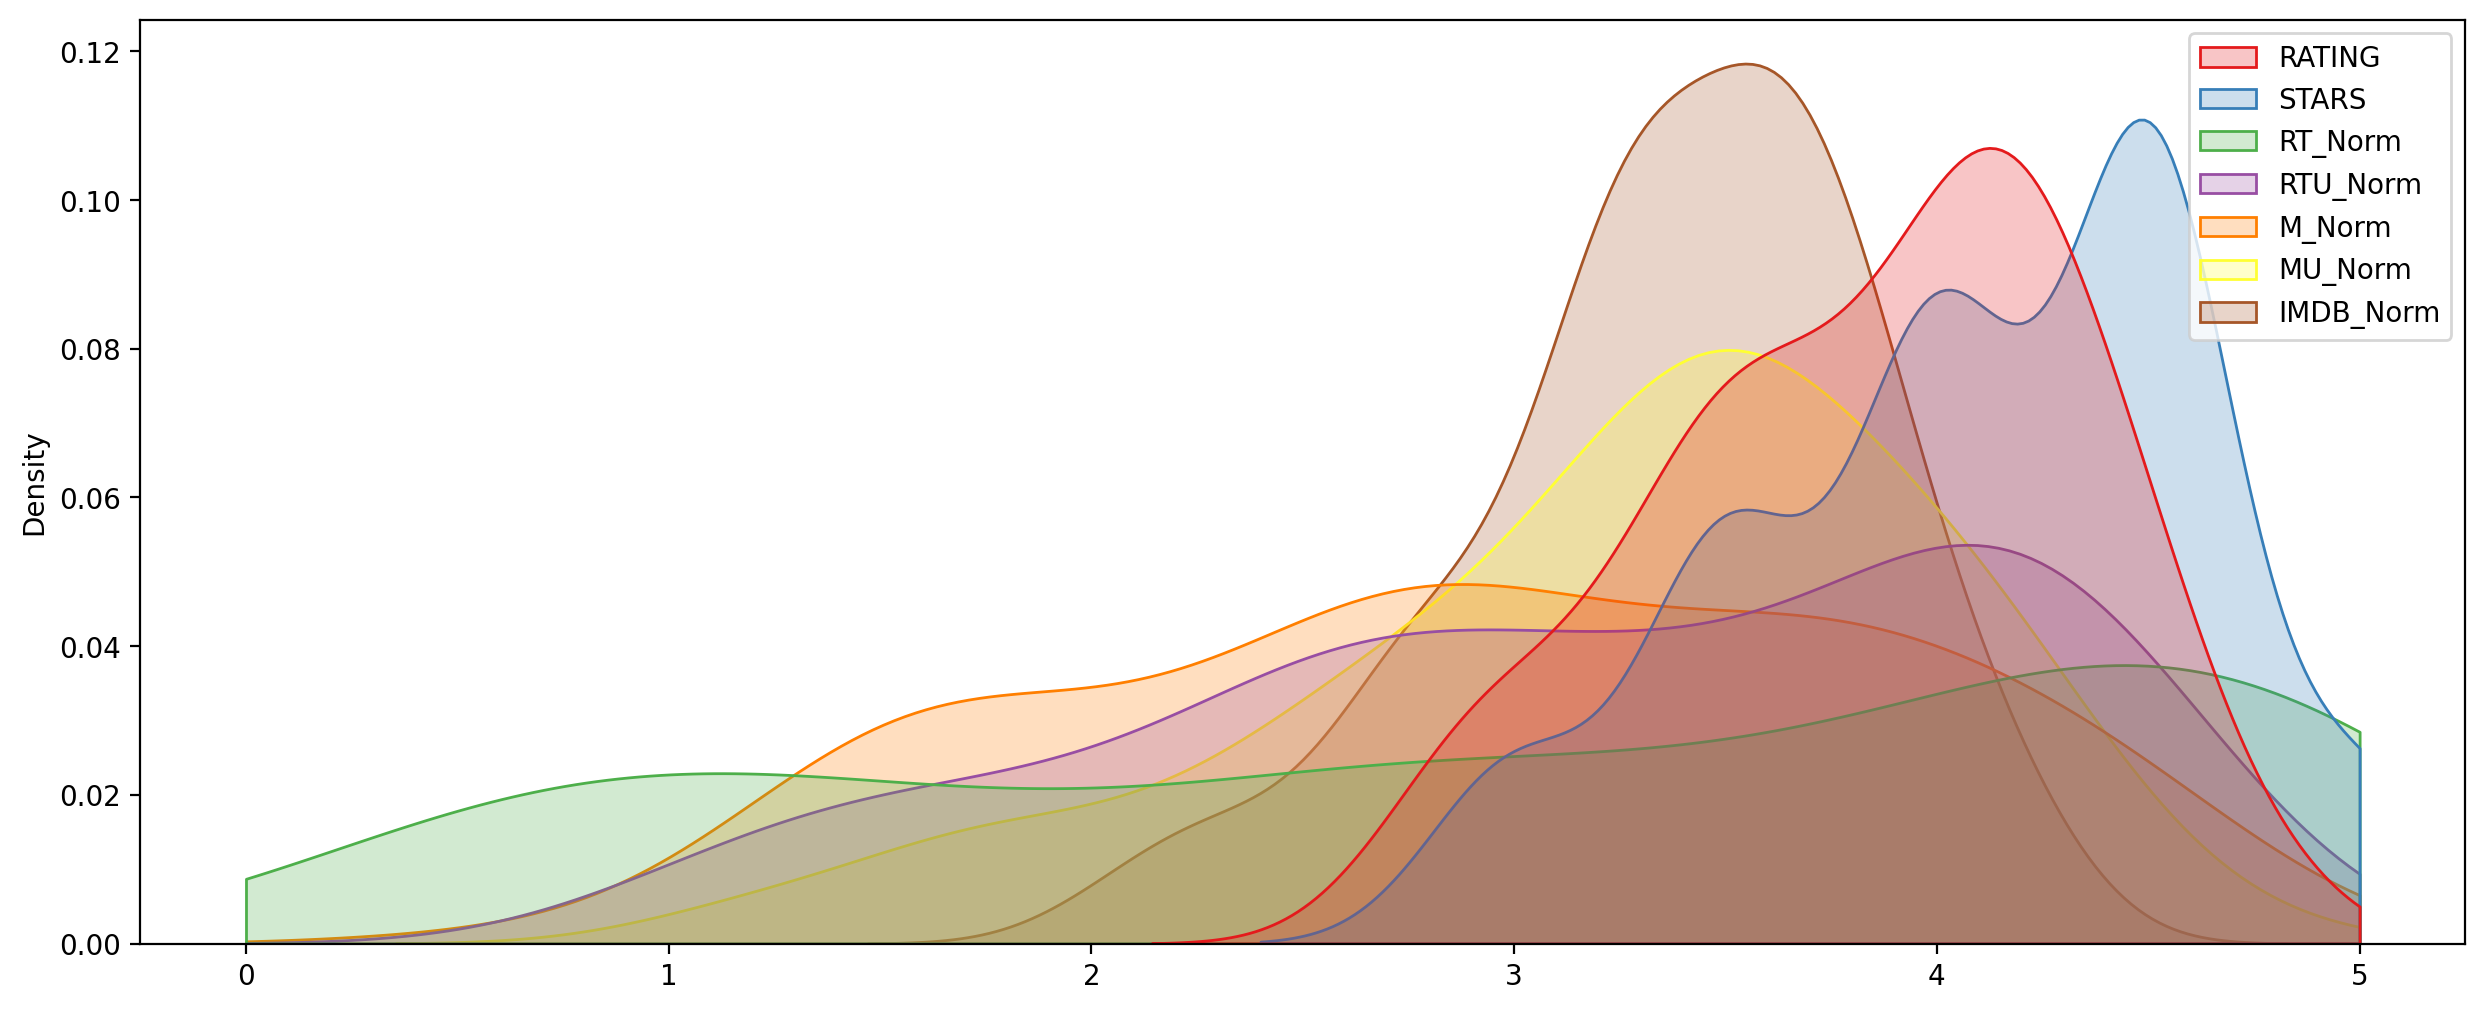

In [154]:
# kde plot for all sites
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=df_norm,shade=True,clip=[0,5],palette='Set1')

<AxesSubplot:ylabel='Count'>

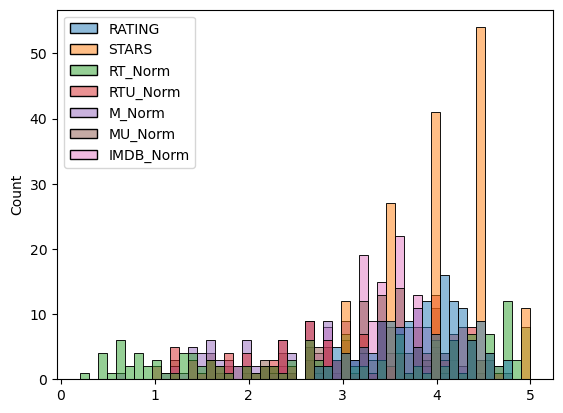

In [164]:
sns.histplot(data=df_norm,bins=50)

<AxesSubplot:ylabel='Density'>

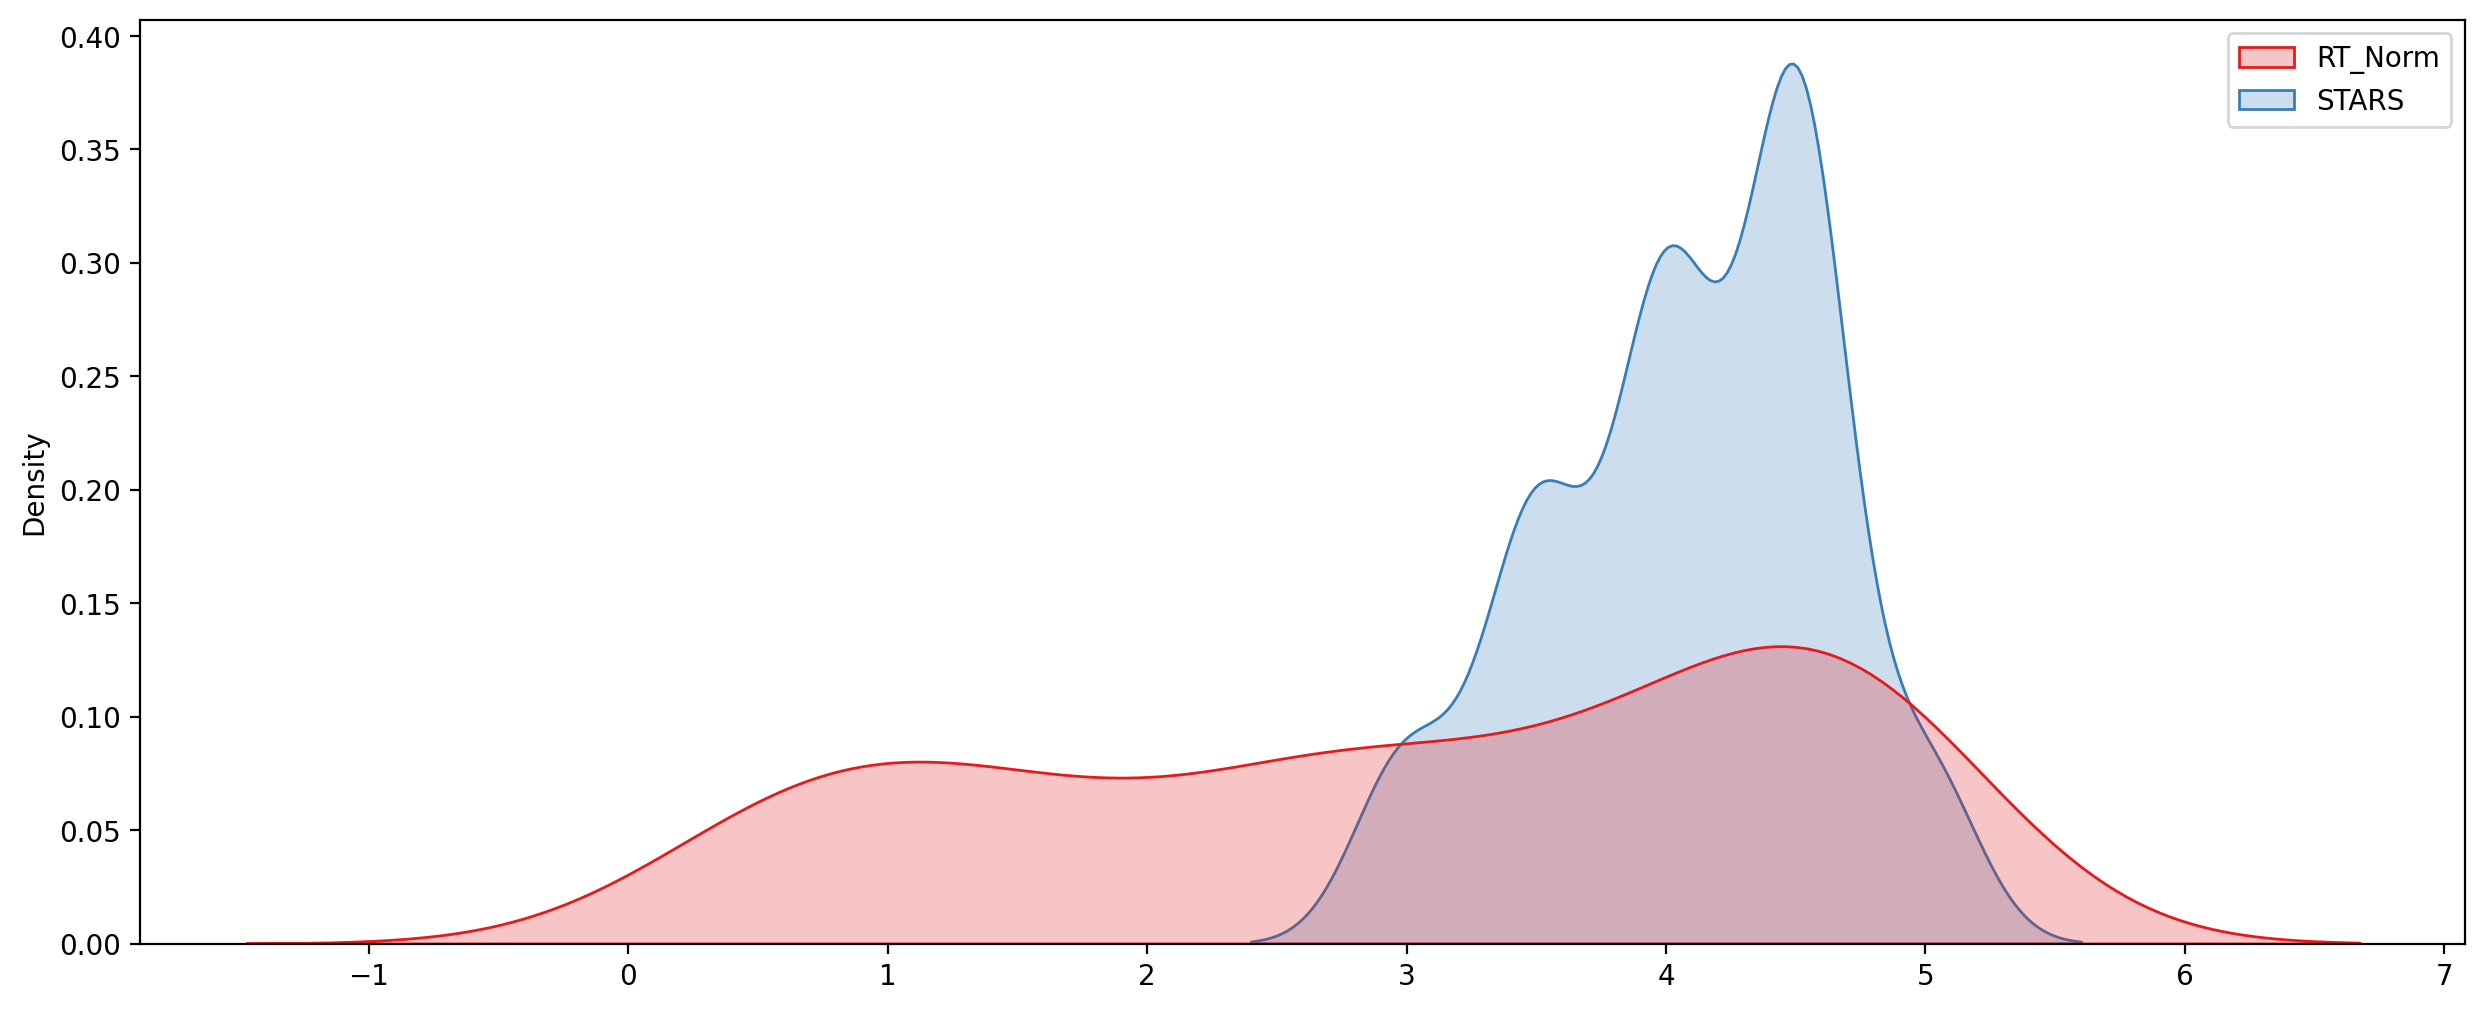

In [162]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=df_norm[['RT_Norm','STARS']],shade=True,palette='Set1')


,RT_Norm,STARS
0,1.2,4.0
1,3.6,4.5
2,3.6,5.0
3,4.0,5.0
4,4.9,4.5
...,...,...
140,4.4,3.5
141,4.8,4.0
142,4.6,4.5
143,4.8,4.0


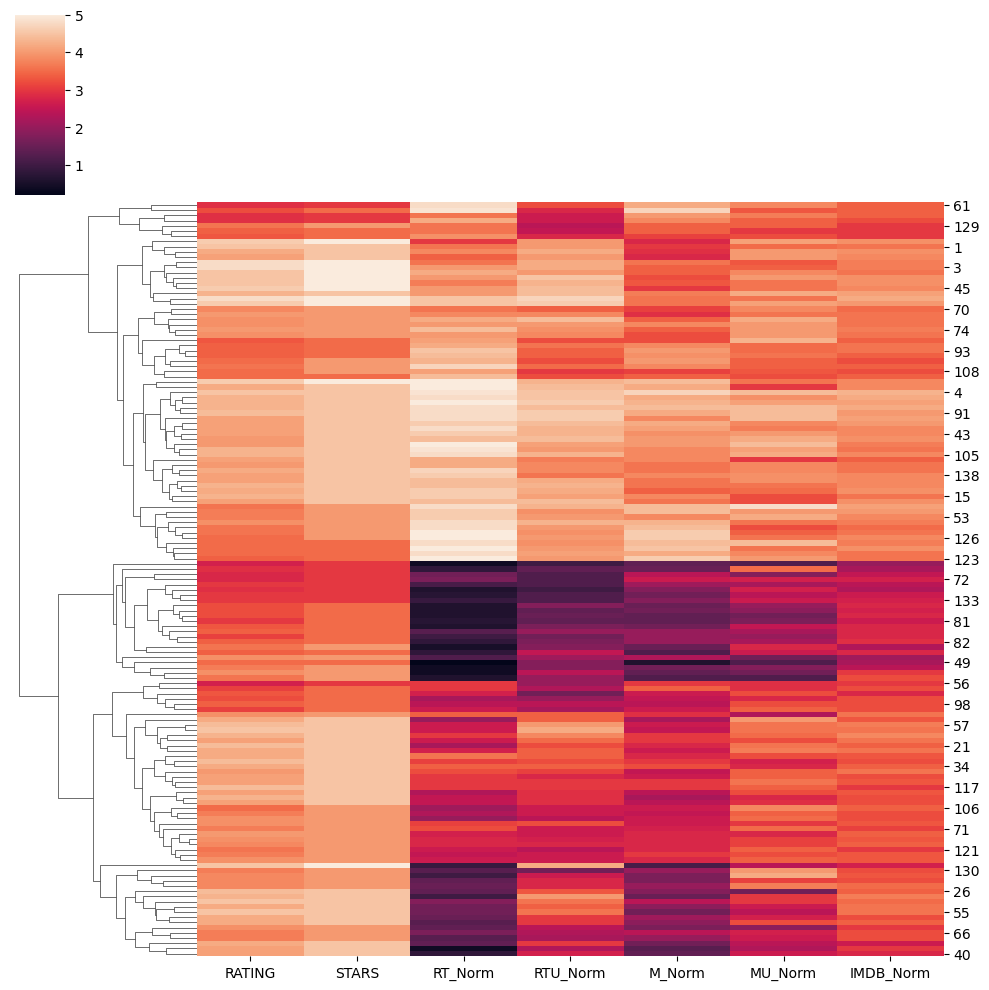

In [165]:
# worst movie rated across all platforms
sns.clustermap(data=df_norm,col_cluster=False)

In [166]:
df_norm.columns

Index(['RATING', 'STARS', 'RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm',
       'IMDB_Norm'],
      dtype='object')

In [167]:
norm_films = df[['FILM','RATING', 'STARS', 'RT_Norm', 'RTU_Norm', 'M_Norm', 'MU_Norm',
       'IMDB_Norm']]
norm_films

,FILM,RATING,STARS,RT_Norm,RTU_Norm,M_Norm,MU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),3.9,4.0,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),4.8,5.0,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),4.8,5.0,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),3.6,4.0,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.2,4.5,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),3.9,4.0,4.8,4.3,4.3,3.6,3.7


In [170]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

<AxesSubplot:ylabel='Density'>

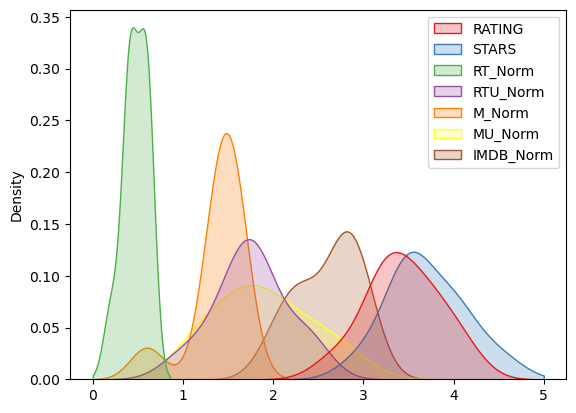

In [171]:
sns.kdeplot(data=worst_films,shade=True,clip=[0,5],palette='Set1')